> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [37]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
df_noshow=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df_noshow.head()



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [38]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


In [39]:
df_noshow.info()
df_noshow.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


(110527, 14)

In [40]:
df_noshow.nunique()

PatientId          61744
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [41]:
df_noshow.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [42]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [43]:
#Renaming Column Labels
df_noshow=df_noshow.rename(columns={'PatientId':'PatientID','Hipertension':'Hypertension','Handcap':'Handicap','SMS_received':'SMS_Received','No-show':'No_Show'})


In [44]:
#Convert dataype of "PatientId" column from float to int
df_noshow['PatientID']=pd.to_numeric(df_noshow['PatientID'],downcast='integer')
df_noshow['PatientID'].dtype


dtype('int64')

In [45]:
#Converting datatype Of ScheduledDay and AppointmentDay from int to datetime
df_noshow['ScheduledDay']=pd.to_datetime(df_noshow['ScheduledDay'])
df_noshow['AppointmentDay']=pd.to_datetime(df_noshow['AppointmentDay'])
df_noshow.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientID         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_Received      110527 non-null int64
No_Show           110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


In [46]:
df_noshow['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [47]:
#Droppping rows containing Age less than 0
df_noshow= df_noshow.drop(df_noshow[df_noshow.Age<0].index)
df_noshow['Age'].unique()
df_noshow.shape

(110526, 14)

In [48]:
sum(df_noshow.duplicated())

0

In [49]:
#Dropping duplicates 
df_noshow.drop_duplicates(['PatientID','ScheduledDay'], keep='first',inplace=True)
df_noshow.shape

(109192, 14)

In [50]:
## converting no-show status to numbers no-show =0 , show =1
df_noshow['No_Show']=df_noshow['No_Show'].str.replace('No','Show-up')
df_noshow['No_Show']=df_noshow['No_Show'].str.replace('Yes','No-Show')
#df_noshow['No_Show']=df_noshow['No_Show'].astype(int)

In [51]:
df_noshow['Day_Of_Week'] = df_noshow['AppointmentDay'].dt.weekday_name
df_noshow.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show,Day_Of_Week
0,29872500000000,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Show-up,Friday
1,558998000000000,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Show-up,Friday
2,4262960000000,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Show-up,Friday
3,867951000000,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Show-up,Friday
4,8841190000000,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Show-up,Friday


Text(0.5,1,'No.Of Patients having Scholarship')

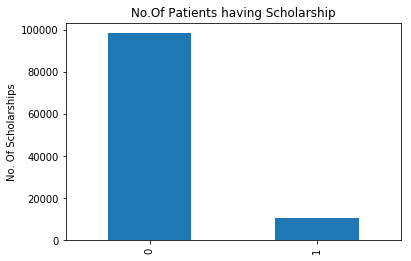

In [52]:
df_noshow.Scholarship.value_counts().plot(kind='bar')
plt.ylabel('No. Of Scholarships')
plt.title('No.Of Patients having Scholarship')


        Scholarship
Gender             
F              8738
M              1988


Text(0,0.5,'Scholarship')

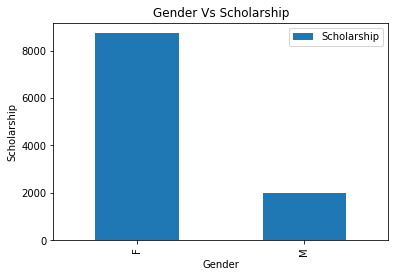

In [53]:
group= df_noshow[['Gender','Scholarship']]
gender_group = group.groupby(['Gender']).sum()
print(gender_group)
gender_group.plot(kind='bar',title="Gender Vs Scholarship")
plt.ylabel('Scholarship')

In [54]:
#Patients who have scholarships are mostly females

Text(0.5,1,'Number of Appointments per patient')

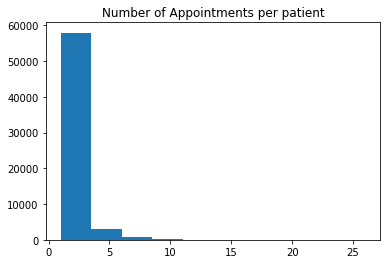

In [55]:
patient_appointment = df_noshow.groupby('PatientID')['AppointmentDay'].nunique()
plt.hist(patient_appointment);
plt.title("Number of Appointments per patient")


In [56]:
patient_appointment.mean()

1.6477819347942277

In [57]:
df_noshow.describe()

,PatientID,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received
count,1.091920e+05,1.091920e+05,109192.000000,109192.000000,109192.000000,109192.000000,109192.000000,109192.000000,109192.000000
mean,1.475127e+14,5.675753e+06,37.097351,0.098231,0.197377,0.071864,0.030497,0.022199,0.322872
std,2.560826e+14,7.116156e+04,23.140676,0.297628,0.398021,0.258264,0.171950,0.161109,0.467576
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.176525e+12,5.640751e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172600e+13,5.680910e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439468e+13,5.725951e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [58]:
group=df_noshow.groupby(['Gender'])['No_Show'].mean()*100
Gender_noshow=group.groupby(['Gender']).sum()
print(Gender_noshow)
Gender_noshow.plot(kind='bar',title='Which gender has more show up')
plt.ylabel('No_Show')

AttributeError: Cannot access callable attribute 'groupby' of 'SeriesGroupBy' objects, try using the 'apply' method

In [ ]:
group=df_noshow.groupby(['Gender', 'SMS_Received'])['No_Show'].mean()*100
print(group)
group.plot(kind='bar',title='Which gender has more show up')
plt.ylabel('No_Show')

In [ ]:
#How to mark bar plot with a range of values(buckets) 
#like 0-20,20-40 for x-axis

In [ ]:
group=df_noshow.groupby(['Age'])['No_Show'].mean()*100
Age_noshow=group.groupby(['Age']).sum()
#bins=[0,20,40,60,80,100,120]
#plt.hist(Age_noshow,bins=10)
Age_noshow.plot(kind='bar',figsize=(20,10),title='Which age has high number of show up')
plt.ylabel('No_Show')

In [59]:
grouped=df_noshow.groupby("Neighbourhood")
for name, group in grouped:
    print(name)
    print(group.shape)
    print(type(group))
    

AEROPORTO
(8, 15)
<class 'pandas.core.frame.DataFrame'>
ANDORINHAS
(2136, 15)
<class 'pandas.core.frame.DataFrame'>
ANTÔNIO HONÓRIO
(271, 15)
<class 'pandas.core.frame.DataFrame'>
ARIOVALDO FAVALESSA
(280, 15)
<class 'pandas.core.frame.DataFrame'>
BARRO VERMELHO
(422, 15)
<class 'pandas.core.frame.DataFrame'>
BELA VISTA
(1886, 15)
<class 'pandas.core.frame.DataFrame'>
BENTO FERREIRA
(853, 15)
<class 'pandas.core.frame.DataFrame'>
BOA VISTA
(312, 15)
<class 'pandas.core.frame.DataFrame'>
BONFIM
(2754, 15)
<class 'pandas.core.frame.DataFrame'>
CARATOÍRA
(2529, 15)
<class 'pandas.core.frame.DataFrame'>
CENTRO
(3278, 15)
<class 'pandas.core.frame.DataFrame'>
COMDUSA
(299, 15)
<class 'pandas.core.frame.DataFrame'>
CONQUISTA
(845, 15)
<class 'pandas.core.frame.DataFrame'>
CONSOLAÇÃO
(1365, 15)
<class 'pandas.core.frame.DataFrame'>
CRUZAMENTO
(1365, 15)
<class 'pandas.core.frame.DataFrame'>
DA PENHA
(2182, 15)
<class 'pandas.core.frame.DataFrame'>
DE LOURDES
(301, 15)
<class 'pandas.core.fram

In [60]:
grouped["Age"].agg(np.mean)

Neighbourhood
AEROPORTO              53.125000
ANDORINHAS             35.813202
ANTÔNIO HONÓRIO        36.845018
ARIOVALDO FAVALESSA    32.939286
BARRO VERMELHO         45.109005
BELA VISTA             35.174973
BENTO FERREIRA         44.711606
BOA VISTA              31.243590
BONFIM                 35.196805
CARATOÍRA              36.981416
CENTRO                 42.566504
COMDUSA                36.357860
CONQUISTA              31.905325
CONSOLAÇÃO             35.887179
CRUZAMENTO             34.822711
DA PENHA               36.236939
DE LOURDES             45.083056
DO CABRAL              34.652330
DO MOSCOSO             33.712531
DO QUADRO              40.448931
ENSEADA DO SUÁ         38.178723
ESTRELINHA             37.771375
FONTE GRANDE           38.442943
FORTE SÃO JOÃO         33.255019
FRADINHOS              45.701550
GOIABEIRAS             39.593391
GRANDE VITÓRIA         37.494865
GURIGICA               30.152120
HORTO                  34.800000
ILHA DAS CAIEIRAS      33.514

In [61]:
grouped = df_noshow.groupby("Neighbourhood")["No_Show"]
grouped.apply(lambda x:x.value_counts())



Neighbourhood               
AEROPORTO            Show-up       7
                     No-Show       1
ANDORINHAS           Show-up    1663
                     No-Show     473
ANTÔNIO HONÓRIO      Show-up     221
                     No-Show      50
ARIOVALDO FAVALESSA  Show-up     218
                     No-Show      62
BARRO VERMELHO       Show-up     331
                     No-Show      91
BELA VISTA           Show-up    1509
                     No-Show     377
BENTO FERREIRA       Show-up     664
                     No-Show     189
BOA VISTA            Show-up     254
                     No-Show      58
BONFIM               Show-up    2206
                     No-Show     548
CARATOÍRA            Show-up    1950
                     No-Show     579
CENTRO               Show-up    2591
                     No-Show     687
COMDUSA              Show-up     245
                     No-Show      54
CONQUISTA            Show-up     689
                     No-Show     156
CONSOLAÇÃ

In [62]:
grouped = df_noshow.groupby("Diabetes")["No_Show"]
grouped.apply(lambda x:x.value_counts())

Diabetes         
0         Show-up    80894
          No-Show    20451
1         Show-up     6437
          No-Show     1410
Name: No_Show, dtype: int64

In [63]:
pd.crosstab(df_noshow.Neighbourhood,df_noshow.No_Show).apply(lambda r:r/r.sum()*100,axis=1)

No_Show,No-Show,Show-up
Neighbourhood,,
AEROPORTO,12.500000,87.500000
ANDORINHAS,22.144195,77.855805
ANTÔNIO HONÓRIO,18.450185,81.549815
ARIOVALDO FAVALESSA,22.142857,77.857143
BARRO VERMELHO,21.563981,78.436019
BELA VISTA,19.989396,80.010604
BENTO FERREIRA,22.157093,77.842907
BOA VISTA,18.589744,81.410256
BONFIM,19.898330,80.101670


In [64]:
pd.crosstab([df_noshow.Neighbourhood,df_noshow.Gender],[df_noshow.No_Show,]).apply(lambda r:r/r.sum()*100,axis=1)

No_Show                       No-Show     Show-up
Neighbourhood       Gender                       
AEROPORTO           F       20.000000   80.000000
                    M        0.000000  100.000000
ANDORINHAS          F       22.103004   77.896996
                    M       22.222222   77.777778
ANTÔNIO HONÓRIO     F       16.184971   83.815029
                    M       22.448980   77.551020
ARIOVALDO FAVALESSA F       22.346369   77.653631
                    M       21.782178   78.217822
BARRO VERMELHO      F       20.608108   79.391892
                    M       23.809524   76.190476
BELA VISTA          F       18.619583   81.380417
                    M       22.656250   77.343750
BENTO FERREIRA      F       20.719178   79.280822
                    M       25.278810   74.721190
BOA VISTA           F       17.346939   82.653061
                    M       20.689655   79.310345
BONFIM              F       21.847763   78.152237
                    M       16.650532   83.349468
CARATOÍRA           F       22.578692   77.421308
                    M       23.489168   76.510832
CENTRO              F       20.206186   79.793814
                    M       22.047833   77.952167
COMDUSA             F       18.378378   81.621622
                    M       17.543860   82.456140
CONQUISTA           F       17.678571   82.321429
                    M       20.000000   80.000000
CONSOLAÇÃO          F       18.786464   81.213536
                    M       14.566929   85.433071
CRUZAMENTO          F       22.787611   77.212389
                    M       18.872017   81.127983
...                               ...         ...
SANTA MARTHA        F       16.471784   83.528216
                    M       13.868613   86.131387
SANTA TEREZA        F       20.070838   79.929162
                    M       20.920502   79.079498
SANTO ANDRÉ         F       21.925134   78.074866
                    M       15.375723   84.624277
SANTO ANTÔNIO       F       16.759465   83.240535
                    M       18.494624   81.505376
SANTOS DUMONT       F       29.593095   70.406905
                    M       28.035320   71.964680
SANTOS REIS         F       20.991254   79.008746
                    M       19.689119   80.310881
SEGURANÇA DO LAR    F       19.565217   80.434783
                    M       19.230769   80.769231
SOLON BORGES        F       14.929577   85.070423
                    M       14.035088   85.964912
SÃO BENEDITO        F       19.338159   80.661841
                    M       20.302376   79.697624
SÃO CRISTÓVÃO       F       20.982515   79.017485
                    M       17.335474   82.664526
SÃO JOSÉ            F       21.721959   78.278041
                    M       21.251820   78.748180
SÃO PEDRO           F       21.017845   78.982155
                    M       20.598007   79.401993
TABUAZEIRO          F       18.213573   81.786427
                    M       17.983651   82.016349
UNIVERSITÁRIO       F       23.684211   76.315789
                    M       13.157895   86.842105
VILA RUBIM          F       14.482759   85.517241
                    M       21.111111   78.888889

[159 rows x 2 columns]

In [65]:
pd.crosstab( [df_noshow.No_Show],[df_noshow.Gender],values=df_noshow.Age,aggfunc=np.average)

Gender,F,M
No_Show,,
No-Show,36.147879,30.747881
Show-up,39.616926,34.449187


In [66]:
#Average age of females who don't show up is more than the males.

No_Show        No-Show    Show-up
Day_Of_Week                      
Friday       21.143071  78.856929
Monday       20.459709  79.540291
Saturday     23.076923  76.923077
Thursday     19.215457  80.784543
Tuesday      19.851460  80.148540
Wednesday    19.513530  80.486470


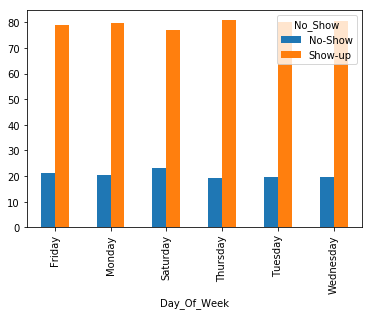

In [67]:
days_noshow=pd.crosstab(df_noshow.Day_Of_Week, df_noshow.No_Show).apply(lambda r:r/r.sum()*100,axis=1)
print(days_noshow)
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
days_noshow.plot(kind='bar')
plt.xticks=(days)


In [68]:
#Patients who don't show up is maximum on Weekend(Saturday) compared to weekdays

In [69]:
#SMS_Received
pd.crosstab(df_noshow.No_Show,df_noshow.SMS_Received)

SMS_Received,0,1
No_Show,,
No-Show,12144,9717
Show-up,61793,25538


In [70]:
#Though patients did not recieved the SMS,they showed-up.Majority of patients who showed up did not recieve SMS

In [71]:
#Scholarship
pd.crosstab(df_noshow.No_Show,df_noshow.Scholarship).apply(lambda r:r/r.sum()*100,axis=1)

Scholarship,0,1
No_Show,,
No-Show,88.422305,11.577695
Show-up,90.616162,9.383838


In [72]:
#88.4% of the patients who did not have scholarship did not show-up and 11.5% of patients who had scholarship did not show up.
#Patients having scholarship and not showing up was more than the patients showing up.

In [73]:
pd.crosstab( df_noshow.No_Show,df_noshow.Diabetes).apply(lambda r:r/r.sum()*100,axis=1)

Diabetes,0,1
No_Show,,
No-Show,93.550158,6.449842
Show-up,92.629192,7.370808


In [74]:
pd.crosstab(df_noshow.No_Show,df_noshow.Hypertension).apply(lambda r:r/r.sum()*100,axis=1)

Hypertension,0,1
No_Show,,
No-Show,83.106903,16.893097
Show-up,79.550217,20.449783


In [75]:
pd.crosstab(df_noshow.No_Show,df_noshow.Alcoholism).apply(lambda r:r/r.sum()*100,axis=1)

Alcoholism,0,1
No_Show,,
No-Show,96.971776,3.028224
Show-up,96.944957,3.055043


In [76]:
pd.crosstab(df_noshow.No_Show,df_noshow.Handicap).apply(lambda r:r/r.sum()*100,axis=1)

Handicap,0,1,2,3,4
No_Show,,,,,
No-Show,98.183981,1.628471,0.169251,0.013723,0.004574
Show-up,97.921700,1.901959,0.164890,0.009161,0.002290


In [77]:

noshow_table=pd.crosstab([df_noshow.Hypertension,df_noshow.Diabetes],[df_noshow.No_Show])
noshow_table

No_Show                No-Show  Show-up
Hypertension Diabetes                  
0            0           17882    68316
             1             286     1156
1            0            2569    12578
             1            1124     5281

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. It's also a good idea to look over the project rubric, found on the project submission page at the end of the lesson.

> To export the report to the workspace, you should run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the jupyter icon in the upper left). Alternatively, you can download the html report via the **File** > **Download as** submenu and then manually upload it to the workspace directory. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])